In [32]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png",1) #rgb

In [33]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

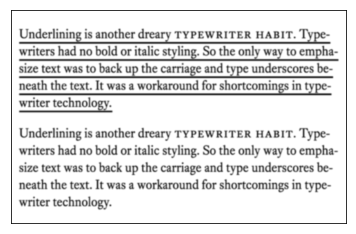

In [34]:
from matplotlib import pyplot as plt

img = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png",0) #greyscale
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

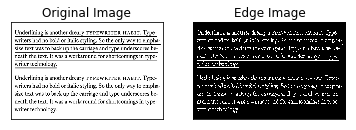

In [35]:
img = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png",0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


In [36]:
# This code block does a Garyscale using a simple technique rather than using the cv2.COLOR_BGR2GRAY
img = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png",0)
cv2.imshow('Grayscale', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [37]:
# This code takes the image and rotates, note we have used a new variable called as image here instead of img
image = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png")
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, .5)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
px = img[100,100]
print px


# accessing only blue pixel
blue = img[100,100,0]
print blue


255


IndexError: too many indices for array

In [40]:
# accessing RED value
img.item(10,10,2)
#59


# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

ValueError: incorrect number of indices for array

In [41]:
print img.shape
print img.size
print img.dtype

(565L, 886L)
500590
uint8


In [43]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball
cv2.imshow('Hough Lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
import cv2
import numpy as np

image = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png")

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 190 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 190)

# We iterate through each line and convert it to the format
# required by cv.lines (i.e. requiring end points)
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

cv2.imshow('Hough Lines', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [45]:
import cv2
import numpy as np

img = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)
cv2.imshow('Hough Lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
import cv2
import numpy as np

img = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


edges = cv2.Canny(gray,100,200,apertureSize = 3)
cv2.imshow('edges',edges)

cv2.waitKey(0)

minLineLength = 50
maxLineGap = 50
lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imshow('hough',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
''' file name : houghlines.py
Description : This sample shows how to detect lines using Hough Transform
This is Python version of this tutorial : http://opencv.itseez.com/doc/tutorials/imgproc/imgtrans/hough_lines/hough_lines.html
Level : Beginner
Benefits : Learn to find lines in an image and draw them
Usage : python houghlines.py 
Written by : Abid K. (abidrahman2@gmail.com) , Visit opencvpython.blogspot.com for more tutorials '''

import cv2
import numpy as np

print " Hough Lines demo "
print " Press h to draw lines using cv2.HoughLines()"
print " Press p to draw lines using cv2.HoughLinesP()"
print " All the parameter values selected at random, Change it the way you like"

im = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png")
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,150,200,apertureSize = 3)

cv2.imshow('houghlines',im)

while(True):
    img = im.copy()
    k = cv2.waitKey(0)

    if k == ord('h'):   # Press 'h' to enable cv2.HoughLines()
        lines = cv2.HoughLines(edges,1,np.pi/180,275)
        for rho,theta in lines[0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))   # Here i have used int() instead of rounding the decimal value, so 3.8 --> 3
            y1 = int(y0 + 1000*(a))    # But if you want to round the number, then use np.around() function, then 3.8 --> 4.0
            x2 = int(x0 - 1000*(-b))   # But we need integers, so use int() function after that, ie int(np.around(x))
            y2 = int(y0 - 1000*(a))
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
        cv2.imshow('houghlines',img)

    elif k == ord('p'): # Press 'p' to enable cv2.HoughLinesP()
        lines = cv2.HoughLinesP(edges,1,np.pi/180,150, minLineLength = 100, maxLineGap = 10)
        for x1,y1,x2,y2 in lines[0]:
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
        cv2.imshow('houghlines',img)

    elif k == 27:    # Press 'ESC' to exit
        break

cv2.waitKey(0)
cv2.destroyAllWindows()


 Hough Lines demo 
 Press h to draw lines using cv2.HoughLines()
 Press p to draw lines using cv2.HoughLinesP()
 All the parameter values selected at random, Change it the way you like


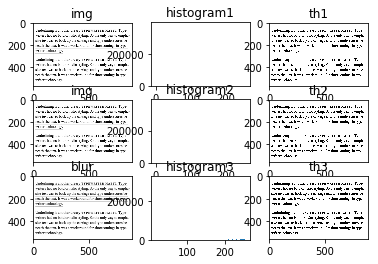

In [48]:
img = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png",0)
 
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# plot all the images and their histograms
titles = ['img','histogram1','th1',
          'img','histogram2','th2',
          'blur','histogram3','th3']
 
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(eval(titles[i*3]),'gray')
    plt.title(titles[i*3])
    plt.subplot(3,3,i*3+2),plt.hist(eval(titles[i*3]).ravel(),256)
    plt.title(titles[i*3+1])
    plt.subplot(3,3,i*3+3),plt.imshow(eval(titles[i*3+2]),'gray')
    plt.title(titles[i*3+2])
 
plt.show()

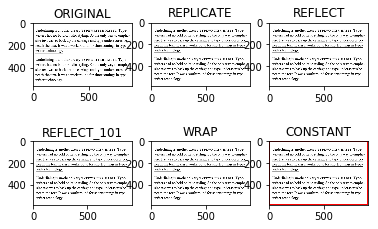

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png")

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

In [50]:
x,y = (98, 33)
w,h =(100, 100)
import cv2
img = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png")
crop_img = img[y:y+h, x:x+w]
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

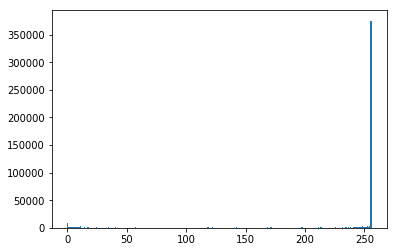

In [24]:
img = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png",0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [61]:
x,y = (98, 33)
w,h =(100, 100)
import cv2
img = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png")
crop_img = img[y:y+h, x:x+w]
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
import numpy as np

def hough_line(img):
  # Rho and Theta ranges
  thetas = np.deg2rad(np.arange(-90.0, 90.0))
  width, height = img.shape
  diag_len = np.ceil(np.sqrt(width * width + height * height))   # max_dist
  rhos = np.linspace(-diag_len, diag_len, diag_len * 2.0)

  # Cache some resuable values
  cos_t = np.cos(thetas)
  sin_t = np.sin(thetas)
  num_thetas = len(thetas)

  # Hough accumulator array of theta vs rho
  accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
  y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges

  # Vote in the hough accumulator
  for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]

    for t_idx in range(num_thetas):
      # Calculate rho. diag_len is added for a positive index
      rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
      accumulator[rho, t_idx] += 1

  return accumulator, thetas, rhos
# Create binary image and call hough_line
image = np.zeros((50,50))
image[10:40, 10:40] = np.eye(30)
accumulator, thetas, rhos = hough_line(image)

# Easiest peak finding based on max votes
idx = np.argmax(accumulator)
rho = rhos[idx / accumulator.shape[1]]
theta = thetas[idx % accumulator.shape[1]]
print "rho={0:.2f}, theta={1:.0f}".format(rho, np.rad2deg(theta))

C:\Users\welcome\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  


TypeError: 'numpy.float64' object cannot be interpreted as an index

In [29]:
def draw_lines(img, houghLines, color=[0, 255, 0], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
 
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)
    

In [30]:
def weighted_img(img, initial_img, p=0.8, o=1., u=0.):         #alpha, beta,lambda
    return cv2.addWeighted(initial_img, p, img, o, u)

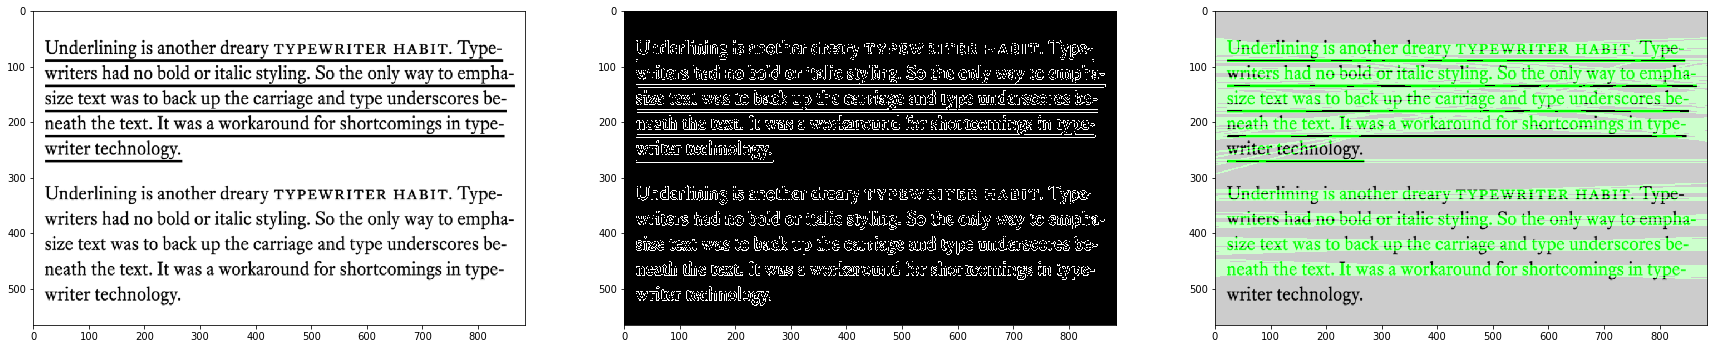

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
 
image = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 0)
edges_image = cv2.Canny(blurred_image, 50, 120)
   
rho_resolution = 1
theta_resolution = np.pi/180
threshold = 155
 
hough_lines = cv2.HoughLines(edges_image, rho_resolution , theta_resolution , threshold)
 
hough_lines_image = np.zeros_like(image)
draw_lines(hough_lines_image, hough_lines)
original_image_with_hough_lines = weighted_img(hough_lines_image,image)
 
plt.figure(figsize = (30,20))
plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(edges_image, cmap='gray')
plt.subplot(133)
plt.imshow(original_image_with_hough_lines, cmap='gray') 
plt.show()

In [1]:
minLineLength = 100
maxLineGap = 10
rho = 1
theta = np.pi/180
threshold = 190
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

NameError: name 'np' is not defined

In [ ]:
np.count_nonzero(edges)

In [ ]:
print ("no. of zero elements = ",  500590-np.count_nonzero(edges))

In [ ]:
inds = np.nonzero(edges)
inds

In [ ]:
np.transpose(inds)

In [ ]:
'''edges[inds]
np.where(edges != 0)[0:]
coordList = np.argwhere( edges == 255 )
print coordList.shape
coordList
numWhitePoints = len( coordList )
numWhitePoints
[y, x] = np.where(edges != 0)[0:]    #[rows,cols]
xy = [x, y]
xy
np.transpose(xy)
print "Found {0} points".format( numWhitePoints )
''' Image type		   coordinates
   2D grayscale		   (row, col)'''
'''array= []
def bool_img_to_idx(img):
     return zip(np.where(array==np.asarray(img).max())[0].tolist(),
                np.where(array==np.asarray(img).max())[1].tolist())
bool_img_to_idx(edges)   ''' 
crop_img = img[np.where(edges != 0)[0:]]'''

In [66]:
import cv2

#Mouse selection status
selection = False
#Empty Regio of Interest Python List 
#roi = [x1, y1, x2, y2]
roi = [20, 230, 849, 270
      ]

# Mouse Callback for ROI selection
# event: The event that took place (left mouse button pressed, left mouse button released, mouse movement, etc).
# x: The x-coordinate of the event.
# y: The y-coordinate of the event.
# flags: Any relevant flags passed by OpenCV.
# params: Any extra parameters supplied by OpenCV.
def roi_selection(event, x, y, flags, param):
    #Refernce to the global variables
    global selection, roi
    #On Left mouse button click records roi with mouse selection status to True
    if event == cv2.EVENT_LBUTTONDOWN:
        selection = True
        roi = [x, y, x, y]
    #On Mouse movement records roi with mouse selection status to True
    elif event == cv2.EVENT_MOUSEMOVE:
        if selection == True:
            roi[2] = x
            roi[3] = y

    #If Left mouse button is released changes mouse selection status to False
    elif event == cv2.EVENT_LBUTTONUP:
        selection = False
        roi[2] = x
        roi[3] = y

#Path of image file to be read
image_read_path="C:\Users\welcome\Desktop\underlining.png"

#Original Image Window Name
window_name='Input Image'

#Cropped Image Window Name
window_crop_name='Cropped Image'

#Escape ASCII Keycode
esc_keycode=27

#Time to waitfor
wait_time=1

#Load an image
#cv2.IMREAD_COLOR = Default flag for imread. Loads color image.
#cv2.IMREAD_GRAYSCALE = Loads image as grayscale.
#cv2.IMREAD_UNCHANGED = Loads image which have alpha channels.
#cv2.IMREAD_ANYCOLOR = Loads image in any possible format
#cv2.IMREAD_ANYDEPTH = Loads image in 16-bit/32-bit otherwise converts it to 8-bit
input_img = cv2.imread(image_read_path,cv2.IMREAD_UNCHANGED)

#Check if image is loaded 
if input_img is not None:
    # Make a copy of original image for cropping
    clone = input_img.copy()
    #Create a Window
    #cv2.WINDOW_NORMAL = Enables window to resize.
    #cv2.WINDOW_AUTOSIZE = Default flag. Auto resizes window size to fit an image.
    cv2.namedWindow(window_name,cv2.WINDOW_AUTOSIZE)
    #Set mouse handler for Window with roi_selection function callback
    cv2.setMouseCallback(window_name, roi_selection)

    #Loop 
    while True:
        #Show original image in window
        cv2.imshow(window_name,input_img)
        
        #if roi has all parameters filled
        if len(roi) == 4:
            #Make a copy of orginal image before drawing rectangle on it
            input_img = clone.copy()
            #Check if any pixl coorinalte is negative and make it zero
            roi = [0 if i < 0 else i for i in roi]
            #Draw rectangle on input_img
            #input_image: source image
            #(roi[0], roi[1]): Vertex of the rectangle
            #(roi[2], roi[3]): Opposite Vertex of the rectangle
            #(0, 255, 0): Rectangular Color
            # 2: Thickness
            cv2.rectangle(input_img, (roi[0],roi[1]), (roi[2],roi[3]), (0, 255, 0), 2)	
            #Make x and y coordiates for cropping in ascending order
            #if x1 = 200,x2= 10 make x1=10,x2=200
            if roi[0] > roi[2]:
                x1 = roi[2]
                x2 = roi[0]
            #else keep it as it is	
            else:
                x1 = roi[0]
                x2 = roi[2]
            #if y1 = 200,y2= 10 make y1=10,y2=200 	
            if roi[1] > roi[3]:
                y1 = roi[3]
                y2 = roi[1]
            #else keep it as it is	
            else:
                y1 = roi[1]
                y2 = roi[3]

            #Crop clone image
            crop_img = clone[y1 : y2 , x1 : x2]
            #check if crop_img is not empty
            if len(crop_img):
                cv2.namedWindow(window_crop_name,cv2.WINDOW_AUTOSIZE)
                #Show image in window
                cv2.imshow(window_crop_name,crop_img)
        
        #Check if any key is pressed
        k = cv2.waitKey(wait_time)
        #Check if ESC key is pressed. ASCII Keycode of ESC=27
        if k == esc_keycode:  
            #Destroy All Windows
            cv2.destroyAllWindows()
            break

else:
    print 'Please Check The Path of Input File'

In [ ]:
##########################################################################################
####
####             Connected-Component labeling Two-Pass algorithm  (8-connectivity)
#### 
##########################################################################################
####
####             Cluster elevation matrix - iso-elevation regions 
####            
##########################################################################################

import numpy as np
## based on http://en.wikipedia.org/wiki/Connected-component_labeling

## based on
## Connected Component Labeling Algorithms for Gray-Scale Images 
## and Evaluation of Performance using Digital Mammograms, R. Dharshana Yapa
## and  K. Harada

#######################################################################################################

class disjointSet:

    def __init__(self, n):
        self.parent = [0]*n
        self.rank = [0]*n

    def makeSet(self,x):
        self.parent[x] = x
        self.rank[x] = 0

    def union(self,x,y):
        xRoot = self.find(x)
        yRoot = self.find(y)
        
        if(xRoot == yRoot):
            return

        if(self.rank[xRoot] < self.rank[yRoot]):
            self.parent[xRoot] = yRoot
        elif(self.rank[xRoot] > self.rank[yRoot]):
            self.parent[yRoot] = xRoot
        else:
            self.parent[yRoot] = xRoot
            self.rank[xRoot] += 1
            
    def find(self, x):
        if (self.parent[x] != x):
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

class disjointRegions(disjointSet):

    def __init__(self, n):
        self.parent = [0]*n
        self.rank = [0]*n
        self.cell = [0]*n # top left hand corner cell for regions
        self.utils = 0 # effective number of new created label 
        self.neighbors = [[]]*n

    def makeSet(self,x,i,j):
        self.parent[x] = x
        self.rank[x] = 0
        self.cell[x] = (i,j)
        self.utils += 1

    def union(self,x,y):
        xRoot,xCell = self.find(x)
        yRoot,yCell = self.find(y)
        if(xRoot == yRoot):
            return

        if(self.rank[xRoot] < self.rank[yRoot]):
            self.parent[xRoot]  = yRoot 
        elif(self.rank[xRoot] > self.rank[yRoot]):
            self.parent[yRoot]  = xRoot 
        else:
            self.parent[yRoot] = xRoot
            self.rank[xRoot] += 1

    def find(self, x):
        if (self.parent[x] != x):
            self.parent[x] = self.find(self.parent[x])[0]

        return self.parent[x], self.cell[self.parent[x]]  # return representative for region: label, cell

    def topDown(self,x):
        '''
        Return all labels whose parent is x's parent
        '''
        tDlabel  = []
        
        for i in range(self.utils):
            #print ' i ' + str(i) + ' self.find(i)[0] ' + str(self.find(i)[0]) + ' x ' + str(x) + ' ' + str(self.find(x)[0])

            if(self.find(i)[0] == self.find(x)[0]):
                
                tDlabel.append(i)
                 
        return tDlabel

##########################################################################################################

class CC_lab:

    def __init__(self,mat):
        self.labels = []
        self.forest = 0
        self.mat = mat

        
            
    def connectedComponentLabel(self,n_clusters=0):
            '''
            Label regions belonging to the same color level
            Algorithm uses disjoint-set data structure (equivalence table) and
            it is based on
            A Run-Based Two-Scan Labeling Algorithm, L. H, Y. Chao, K. Suzuki, IEEE
            '''
            N, M = len(self.mat), len(self.mat[0])
                 
            if(n_clusters==0):
                n_clusters = N * M

            self.labels = sameDimZeroMatrix(self.mat) # build label matrix with appropriate dimensions
            label = 0 # next label to be assigned

            self.forest = disjointRegions(n_clusters) # forest to record equivalences
            
            for i in range(N):
                
                for j in range(M):

                    neighbors = self.connectedNeighbors(i,j) # neighbors with same value
                    
                    #print 'neighbors ' + str(neighbors) +' for pixel at ' + str(i) + ', '+ str(j)
                    
                    if (neighbors == [[],[],[],[]]): # no neighbors at all
                        #print 'case no neighbors at all'
                        self.labels[i][j] = label # new label
                        self.forest.makeSet(label,i,j)
                        
                        label += 1
                            
                    else:
                         
                        ##find minimum neighbor
                        lab = [] # labels for neighbor pixels that are available

                        for pix in range(4):
                            if(neighbors[pix] != []): # some neighbor in this direction
                                x,y = neighbors[pix][0][0], neighbors[pix][0][1]
                                lab.append(self.labels[x][y])
                                
                        if(len(lab) > 1): # at least two neighbors from north, west, north-west, north-east
                            #print 'more than 1 neighbors'
                            self.labels[i][j] = min(lab)
                            
                            for l in range(len(lab)-1):
                                
                                self.forest.union(lab[l], lab[l+1])  # union labels, maybe they are different      
                            
                        else:
                            #print 'only 1 neighbors'
                            if(neighbors[0] != []):
                                #print 'adopted west'
                                self.labels[i][j] = self.labels[neighbors[0][0][0]][neighbors[0][0][1]]
     
                            elif(neighbors[1] != []): # some north neighbor only
                                #print 'adopted north' 
                                self.labels[i][j] = self.labels[neighbors[1][0][0]][neighbors[1][0][1]]

                            elif(neighbors[2] != []): # some north-west neighbor only
                                #print 'adopted north-west' 
                                self.labels[i][j] = self.labels[neighbors[2][0][0]][neighbors[2][0][1]]
              
                            elif(neighbors[3] != []): # some north-east neighbor only
                                #print 'adopted north-east' 
                                self.labels[i][j] = self.labels[neighbors[3][0][0]][neighbors[3][0][1]] 

                    if(neighbors[0] == [] and i > 0):
                        self.updateNeighbors(i,j,i-1,j) 

                    if(neighbors[1] == [] and j > 0):
                        self.updateNeighbors(i,j,i,j-1)

                    if(neighbors[2] == [] and i > 0 and j > 0):
                        self.updateNeighbors(i,j,i-1,j-1)

                    if(neighbors[3] == [] and i > 0 and j < M-1):
                        self.updateNeighbors(i,j,i-1,j+1)

            # second pass
            for i in range(N):

                for j in range(M):

                    self.labels[i][j] = self.forest.find(self.labels[i][j])[0]



    def updateNeighbors(self, i, j, k, l):
        '''
        Region labeled with label(i,j) and region labeled with label(k,l) are neighbor, update
        self.forest.neighbors twice
        '''
        self.forest.neighbors[self.labels[i][j]] = np.unique([x for x in self.forest.neighbors[self.labels[i][j]]] + [self.labels[k][l]])
        self.forest.neighbors[self.labels[k][l]] = np.unique([x for x in self.forest.neighbors[self.labels[k][l]]] + [self.labels[i][j]])


              
    def neighborRegions(self,labelij,mat):
        '''
        Return neighbor regions for the region with label labelij
        '''
        neighbors = []
        R,C = len(mat), len(mat[0])
 
        parentij = self.forest.find(labelij)[0] # representative for the region which the cell i,j belongs to
        areas = self.forest.topDown(parentij)  # list of areas in the region which the cell i,j belongs to

        for area in areas:
            
            neighboor_ = self.forest.neighbors[area]

            for k in range(len(neighboor_)):
                neighboor_label = self.forest.find(neighboor_[k])[0]
                if(neighboor_label != labelij):
                    neighbors.append(neighboor_label)
             
        return np.unique(neighbors)




    def labelToElevation(self, label_i):
        '''
        From label, retrieve elevation in matrix self.mat
        '''
        x,y = self.forest.cell[label_i]
        return self.mat[x][y]

        
        
    def connectedNeighbors(self,i, j): 
        '''
        Return coordinates for neighbors of pixel i, j that have same value
        as pixel i, j (8-connectivity)
        '''
        neighbors = []
        for z in range(4):
            neighbors.append([])

        N, M = len(self.mat), len(self.mat[0])
        
        if(i >= N or j >= M or i < 0 or j < 0): # exceed dimensions
            return []

        val = self.mat[i][j]
        
        if(i == 0 and j == 0): ## top left-hand corner, no neighbors
            return neighbors

        # i or j is not zero
        if(j > 0):
            
            if(val == self.mat[i][j-1]):
                neighbors[0].append((i, j-1)) ## west
  
        if(i > 0):
            
            if(val == self.mat[i-1][j]):
                neighbors[1].append((i-1, j)) ## north

        if(i > 0 and j > 0): 
            if(val == self.mat[i-1][j-1]):
                neighbors[2].append((i-1, j-1)) ## north-west
        
        if(i > 0 and j < M-1): 
            if(val == self.mat[i-1][j+1]):
                neighbors[3].append((i-1, j+1)) ## north-east
                
        return neighbors


    def matrixFromLabelsList(self, region_values, N, M):
        '''
        Input array region_values contains values for each region in self.labels.
        Returns the matrix with pixel i,j colored with the value for the region which this pixel belongs to.
        '''
        toPlot = []
    
        for i in range(N):
            tmp = []
            for j in range(M):
                tmp.append(region_values[self.forest.find(self.labels[i][j])[0]-1]) # watershed label for the region (i,j) belongs to
            toPlot.append([x for x in tmp])

        return toPlot 

     
def sameDimZeroMatrix(mat):
    '''
    Create matrix with same dimensions as mat with zeros
    '''
    zeros = []
    
    for i in range(len(mat)):
        tmp = []
        for j in range(len(mat[i])):
            tmp.append(0)
        zeros.append([x for x in tmp])
        
    return zeros# Import the cv2 library
import cv2
# Read the image you want connected components of
src = cv2.imread(r"C:\Users\welcome\Desktop\underlining.png",0)
# Threshold it so it becomes binary
ret, thresh = cv2.threshold(src,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# You need to choose 4 or 8 for connectivity type
connectivity = 4  
# Perform the operation
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]

In [ ]:
import sys

import numpy as np
import cv2

im = cv2.imread('pitrain.png')
im3 = im.copy()

gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
thresh = cv2.adaptiveThreshold(blur,255,1,1,11,2)

#################      Now finding Contours         ###################

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

samples =  np.empty((0,100))
responses = []
keys = [i for i in range(48,58)]

for cnt in contours:
    if cv2.contourArea(cnt)>50:
        [x,y,w,h] = cv2.boundingRect(cnt)

        if  h>28:
            cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),2)
            roi = thresh[y:y+h,x:x+w]
            roismall = cv2.resize(roi,(10,10))
            cv2.imshow('norm',im)
            key = cv2.waitKey(0)

            if key == 27:  # (escape to quit)
                sys.exit()
            elif key in keys:
                responses.append(int(chr(key)))
                sample = roismall.reshape((1,100))
                samples = np.append(samples,sample,0)

responses = np.array(responses,np.float32)
responses = responses.reshape((responses.size,1))
print "training complete"

np.savetxt('generalsamples.data',samples)
np.savetxt('generalresponses.data',responses)
#https://stackoverflow.com/questions/9413216/simple-digit-recognition-ocr-in-opencv-python

In [ ]:
import cv2
import numpy as np

#######   training part    ############### 
samples = np.loadtxt('generalsamples.data',np.float32)
responses = np.loadtxt('generalresponses.data',np.float32)
responses = responses.reshape((responses.size,1))

model = cv2.KNearest()
model.train(samples,responses)

############################# testing part  #########################

im = cv2.imread('pi.png')
out = np.zeros(im.shape,np.uint8)
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    if cv2.contourArea(cnt)>50:
        [x,y,w,h] = cv2.boundingRect(cnt)
        if  h>28:
            cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
            roi = thresh[y:y+h,x:x+w]
            roismall = cv2.resize(roi,(10,10))
            roismall = roismall.reshape((1,100))
            roismall = np.float32(roismall)
            retval, results, neigh_resp, dists = model.find_nearest(roismall, k = 1)
            string = str(int((results[0][0])))
            cv2.putText(out,string,(x,y+h),0,1,(0,255,0))

cv2.imshow('im',im)
cv2.imshow('out',out)
cv2.waitKey(0)